In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder as LE
from sklearn.metrics import classification_report, confusion_matrix
#from sklearn.metrics import plot_confusion_matrix

from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
#from keras.layers.convolutional import MaxPooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.utils import to_categorical
#from tensorflow.keras.utils import to_categorical
import tensorflow as tf


import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import pandas as pd
import numpy as np
import math
import time
import sys
import pickle
import os

#import operator
from sklearn.preprocessing import StandardScaler

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  #PCA, LDA, ICA - dimension reduction, sub-space method... classifier er motoi use kora jay
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [8]:
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy import stats
from scipy.stats import iqr
from scipy.stats import entropy

Accuracy formula

In [9]:
# user define function for accuracy
def getAccuracy(testSet, predictions):
	correct = 0
	for x in range(len(testSet)):
		if testSet[x] == predictions[x]:
			correct += 1
	return (correct/float(len(testSet))) * 100.0

In [10]:
data=pd.read_csv('/content/drive/MyDrive/NSU/HAR/AllData.csv')

In [13]:
data=data.drop(['Time', 'Person'],axis=1)

null_percentage(column): This function calculates and prints the percentage and count of missing values in a given column of a DataFrame. Here's how the function works:

column.name retrieves the name of the column.
np.count_nonzero(column.isnull().values) counts the number of non-zero (missing) values in the column.
column.size gets the total number of elements in the column.
The fraction of missing values is calculated as nans / total.
The fraction is multiplied by 100 and cast to an integer to obtain the percentage.
The percentage and count of missing values, along with the column name, are printed.
check_nan(df): This function iterates through all the columns of a DataFrame and applies the null_percentage() function to each column. It provides an overview of missing values in the DataFrame by calling the null_percentage() function for each column.

Additionally, there is a third function make_confusion_matrix(cf, ...), which appears to be a modified version of a function that creates a heatmap visualization of a confusion matrix. However, it seems that there are some unresolved issues or missing parts in the code, as there are commented lines that suggest saving the plot to a file using plt.savefig(), but the filename and dpi are not specified.



In [14]:
def null_percentage(column):
    df_name = column.name
    nans = np.count_nonzero(column.isnull().values)
    total = column.size
    frac = nans / total
    perc = int(frac * 100)
    print('%d%% or %d missing values from [ %s ] column.' % (perc, nans, df_name))

def check_nan(df):
    columns = df.columns
    for col in columns: null_percentage(df[col])

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):

    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks
    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks
    if percent:
        # group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
        group_percentages = ["{0:.2%}".format(value) for value in np.array([cf/np.sum(cf) for cf in conf_mat]).flatten()]

    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])
    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))
        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""
    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')
    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False
    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)
    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
        plt.xticks(rotation=45)
        plt.yticks(rotation=45)
        # plt.savefig('filename.png', dpi=300)
    else:
        plt.xlabel(stats_text)
        # plt.savefig('filename.png', dpi=300)
    if title:
        plt.title(title)
        # plt.savefig('filename.png', dpi=300)

The function check_nan(data) will iterate through each column of the DataFrame data and display the percentage and count of missing values for each column.

In [15]:
check_nan(data)

0% or 0 missing values from [ Acc_x ] column.
0% or 0 missing values from [ Acc_y ] column.
0% or 0 missing values from [ Acc_z ] column.
0% or 0 missing values from [ Gry_x ] column.
0% or 0 missing values from [ Gry_y ] column.
0% or 0 missing values from [ Gry_Z ] column.
0% or 0 missing values from [ Class ] column.


This code will display the column names of the DataFrame data and provide the total number of columns in the DataFrame.

In [16]:
data.columns, len(data.columns)

(Index(['Acc_x', 'Acc_y', 'Acc_z', 'Gry_x', 'Gry_y', 'Gry_Z', 'Class'], dtype='object'),
 7)

In [17]:
data

,Acc_x,Acc_y,Acc_z,Gry_x,Gry_y,Gry_Z,Class
0,0.499756,0.798584,-0.313110,-16.768293,-10.091463,11.189024,Eating
1,0.497314,0.826172,-0.312622,-6.981707,-11.310976,10.731707,Eating
2,0.495605,0.825562,-0.313477,-5.823171,-11.402439,3.993902,Eating
3,0.493408,0.823242,-0.314697,-5.091463,-11.067073,6.890244,Eating
4,0.495605,0.819336,-0.315552,-4.115854,-11.189024,16.890244,Eating
...,...,...,...,...,...,...,...
72089,-0.945923,-0.182861,0.105103,-70.457317,-11.829268,11.463415,Walking
72090,-0.898315,-0.176880,0.078857,-71.280488,-11.890244,10.884146,Walking
72091,-0.863159,-0.199097,0.086548,-71.676829,-19.390244,-1.006098,Walking
72092,-0.904907,-0.189941,0.088989,-58.963415,-10.152439,25.731707,Walking


The code X = data.drop('class', axis=1) creates a new DataFrame X by removing the 'class' attribute from the original DataFrame data. Here's how it works:

The drop() function is called on the DataFrame data.
The first argument 'class' specifies the column label to be dropped.
The axis=1 parameter indicates that the column is to be dropped (as opposed to a row).
The resulting DataFrame without the 'class' attribute is assigned to the variable X.

In [18]:
X=data.drop('Class',axis=1)#remove class atribute

In [19]:
X

,Acc_x,Acc_y,Acc_z,Gry_x,Gry_y,Gry_Z
0,0.499756,0.798584,-0.313110,-16.768293,-10.091463,11.189024
1,0.497314,0.826172,-0.312622,-6.981707,-11.310976,10.731707
2,0.495605,0.825562,-0.313477,-5.823171,-11.402439,3.993902
3,0.493408,0.823242,-0.314697,-5.091463,-11.067073,6.890244
4,0.495605,0.819336,-0.315552,-4.115854,-11.189024,16.890244
...,...,...,...,...,...,...
72089,-0.945923,-0.182861,0.105103,-70.457317,-11.829268,11.463415
72090,-0.898315,-0.176880,0.078857,-71.280488,-11.890244,10.884146
72091,-0.863159,-0.199097,0.086548,-71.676829,-19.390244,-1.006098
72092,-0.904907,-0.189941,0.088989,-58.963415,-10.152439,25.731707


shape of x

In [20]:
X.shape

(72094, 6)

The code y = data.iloc[:, -1] sets the target column of the DataFrame data to the variable y. Here's how it works:

The iloc function is used to index the DataFrame data.
[:, -1] selects all rows (:) and the last column (-1), which corresponds to the target column.
The resulting column is assigned to the variable y.


In [21]:
y=data.iloc[:,-1] #set target column

In [22]:
y

0         Eating
1         Eating
2         Eating
3         Eating
4         Eating
          ...   
72089    Walking
72090    Walking
72091    Walking
72092    Walking
72093    Walking
Name: Class, Length: 72094, dtype: object

In [23]:
X.head()

,Acc_x,Acc_y,Acc_z,Gry_x,Gry_y,Gry_Z
0,0.499756,0.798584,-0.313110,-16.768293,-10.091463,11.189024
1,0.497314,0.826172,-0.312622,-6.981707,-11.310976,10.731707
2,0.495605,0.825562,-0.313477,-5.823171,-11.402439,3.993902
3,0.493408,0.823242,-0.314697,-5.091463,-11.067073,6.890244
4,0.495605,0.819336,-0.315552,-4.115854,-11.189024,16.890244


In [24]:
y.head()

0    Eating
1    Eating
2    Eating
3    Eating
4    Eating
Name: Class, dtype: object

The Counter class from the collections module is used to count the occurrences of each unique value in a sequence. In this case, you can use Counter(y) to count the occurrences of each unique value in the variable y, which represents the target column.

In [25]:
from collections import Counter
Counter(y)

Counter({'Eating': 9560,
         'Speak and Walk': 18673,
         'Speaking': 12867,
         'Staying': 16453,
         'Walking': 14541})

le = LE() and y = le.fit_transform(y.astype(str)) suggests that you are using a label encoder to convert the values in the variable y to numerical labels.

Here's a breakdown of the code:

le = LE(): This line creates an instance of the label encoder object, which is typically imported from the scikit-learn library using from sklearn.preprocessing import LabelEncoder. The label encoder is used to transform categorical labels into numerical values.

y = le.fit_transform(y.astype(str)): This line applies the label encoder to the variable y.

y.astype(str) converts the values in y to strings. This step is necessary if the original values are not already of type str.
le.fit_transform() applies the label encoder to the values in y and returns the encoded labels. The original values in y are replaced with the encoded labels.
After executing these lines, the variable y will contain the transformed numerical labels obtained from the label encoder.

In [26]:
le = LE()
y = le.fit_transform(y.astype(str))

The Counter class from the collections module is used to count the occurrences of each unique value in a sequence. In this case, you can use Counter(y) to count the occurrences of each unique value in the variable y, which represents the transformed numerical labels.

In [27]:
from collections import Counter
Counter(y)

Counter({0: 9560, 1: 18673, 2: 12867, 3: 16453, 4: 14541})

a train-test split and a subsequent train-validation split on the features (X) and target variable (y).

In [28]:
trainX, testX, train_y, test_y = train_test_split(X,y,test_size=0.20)
trainX, valX, train_y, val_y = train_test_split(trainX,train_y,test_size=0.20)

In [29]:
print("Train: {:.2f}%".format( (len(trainX)/len(data))*100 ))
print("Validation: {:.2f}%".format( (len(valX)/len(data))*100 ))
print("Test: {:.2f}%".format( (len(testX)/len(data))*100 ))

Train: 64.00%
Validation: 16.00%
Test: 20.00%


In [30]:
trainX.shape

(46140, 6)

In [31]:
trainX = trainX.values
testX = testX.values
valX = valX.values

a function called scale_data that performs standardization on input data using the StandardScaler class from scikit-learn.

Here's a step-by-step description of the code:

The function takes three input arguments: trainX, testX, and valX, representing the training, testing, and validation data, respectively.

An instance of the StandardScaler class is created and assigned to the variable s.

The fit() method of the scaler is called on trainX to compute the mean and standard deviation of the training data. This step allows the scaler to learn the transformation parameters based on the training set.

The transform() method is then called on trainX, testX, and valX to apply the learned transformation to each dataset. This step scales the data using the computed mean and standard deviation.

The scaled data is reshaped back to the original shape of each dataset using the reshape() method. This step assumes that the input data has a shape of (samples, features).

The function returns the scaled training data as flatTrainX, the scaled testing data as flatTestX, and the scaled validation data as flatValX.

In [32]:
# standardize data
from sklearn.preprocessing import StandardScaler
def scale_data(trainX, testX, valX):
  s = StandardScaler()
  # fit on training data
  s.fit(trainX)
  # apply to training and test data
  flatTrainX = s.transform(trainX)
  flatTestX = s.transform(testX)
  flatValX = s.transform(valX)

	# reshape
  flatTrainX = flatTrainX.reshape((trainX.shape))
  flatTestX = flatTestX.reshape((testX.shape))
  flatValX = flatValX.reshape((valX.shape))

  return flatTrainX, flatTestX, flatValX

trainX, testX, valX = scale_data(trainX, testX, valX) calls the scale_data function to perform standardization on the input data (trainX, testX, and valX), and assigns the scaled data back to the same variables.



In [33]:
trainX, testX, valX = scale_data(trainX, testX, valX)

The code trainX = trainX.reshape(trainX.shape[0], trainX.shape[1], 1), testX = testX.reshape(testX.shape[0], testX.shape[1], 1), and valX = valX.reshape(valX.shape[0], valX.shape[1], 1) reshapes the input data to add an extra dimension of size 1. This is often used when working with Convolutional Neural Networks (CNNs) that expect input data to have a certain shape.



In [34]:
trainX = trainX.reshape(trainX.shape[0], trainX.shape[1], 1)
testX = testX.reshape(testX.shape[0], testX.shape[1], 1)
valX = valX.reshape(valX.shape[0], valX.shape[1], 1)

In [35]:
print(trainX.shape)
print(testX.shape)
print(valX.shape)

(46140, 6, 1)
(14419, 6, 1)
(11535, 6, 1)


train_y = to_categorical(train_y) and val_y = to_categorical(val_y) converts the target labels (train_y and val_y) into one-hot encoded format using the to_categorical function. It seems that the intention was to convert the target labels into categorical variables for multi-class classification tasks.

In [36]:
train_y = to_categorical(train_y)
val_y = to_categorical(val_y)
# test_y = to_categorical(test_y)

In [37]:
train_y

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)

In [38]:
test_y

array([0, 0, 2, ..., 3, 0, 0])

The code Counter(test_y) uses the Counter class from the collections module to count the occurrences of each unique element in the test_y variable.

In [39]:
from collections import Counter
Counter(test_y)

Counter({0: 1936, 2: 2677, 1: 3751, 4: 2846, 3: 3209})

n_timesteps, n_features = trainX.shape[0], trainX.shape[1] assigns the number of timesteps and number of features to the variables n_timesteps and n_features, respectively. The values are obtained from the shape of the trainX array.

In [40]:
verbose, epochs, batch_size = 1, 100, 32
n_timesteps, n_features = trainX.shape[0], trainX.shape[1]
n_timesteps, n_features

(46140, 6)

The code defines a sequential model in Keras for a Convolutional Neural Network (CNN). Here's a breakdown of the code:

model = Sequential() initializes a sequential model.

model.add(Conv1D(filters=16, kernel_size=3, activation='relu', input_shape=(trainX.shape[1],trainX.shape[2]))) adds a 1D convolutional layer to the model. It has 16 filters, a kernel size of 3, and uses the ReLU activation function. The input_shape parameter is set to (trainX.shape[1], trainX.shape[2]), which corresponds to the shape of the input data.

model.add(MaxPooling1D(pool_size=2)) adds a 1D max pooling layer with a pool size of 2. This layer reduces the spatial dimensions of the input by taking the maximum value within each pool.

model.add(Conv1D(filters=32, kernel_size=3, activation='relu')) adds another 1D convolutional layer with 32 filters and a kernel size of 3. It also uses the ReLU activation function.

model.add(MaxPooling1D(pool_size=2)) adds another 1D max pooling layer with a pool size of 2.

model.add(Flatten()) flattens the input data, converting it from a 3D shape to a 1D shape.

model.add(Dense(64, activation='relu')) adds a fully connected dense layer with 64 units and the ReLU activation function.

model.add(Dense(2, activation='softmax')) adds the final dense layer with 2 units and the softmax activation function. This layer is responsible for the output predictions.

opt = tf.keras.optimizers.Adam(learning_rate=0.0001) defines the Adam optimizer with a learning rate of 0.0001.

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy']) compiles the model by specifying the loss function, optimizer, and evaluation metrics. In this case, the categorical cross-entropy loss function is used, and the accuracy metric is computed.

model.summary() prints a summary of the model architecture, including the layer types, output shapes, and the total number of parameters.





he model summary shows the architecture of the CNN model. Here's a breakdown of the summary:

Layer (type): This column indicates the type of layer in the model.

conv1d: 1D Convolutional layer.
max_pooling1d: 1D Max Pooling layer.
flatten: Flatten layer.
dense: Fully connected dense layer.
Output Shape: This column shows the shape of the output from each layer. The None dimension represents the batch size.

Param #: This column displays the number of parameters (weights and biases) in each layer.

The model summary shows the following layers and their details:

conv1d layer:

Output Shape: (None, 30, 16)
Param #: 64
max_pooling1d layer:

Output Shape: (None, 15, 16)
Param #: 0
conv1d_1 layer:

Output Shape: (None, 13, 32)
Param #: 1568
max_pooling1d_1 layer:

Output Shape: (None, 6, 32)
Param #: 0
flatten layer:

Output Shape: (None, 192)
Param #: 0
dense layer:

Output Shape: (None, 64)
Param #: 12352
dense_1 layer:

Output Shape: (None, 2)
Param #: 130
The "Total params" field indicates the total number of parameters in the model, which is 14,114. All of these parameters are trainable.

In [46]:
model = Sequential()
model.add(Conv1D(filters=16, kernel_size=3, activation='relu', input_shape=(trainX.shape[1],trainX.shape[2])))
model.add(MaxPooling1D(pool_size=2))
#model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=32, kernel_size=2, activation='relu'))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
# model.add(Dropout(0.2))
model.add(Conv1D(filters=16, kernel_size=3, activation='relu', padding='same', input_shape=(trainX.shape[1],trainX.shape[2])))
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling1D(pool_size=1))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(5, activation='softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_13 (Conv1D)          (None, 4, 16)             64        
                                                                 
 max_pooling1d_9 (MaxPoolin  (None, 2, 16)             0         
 g1D)                                                            
                                                                 
 conv1d_14 (Conv1D)          (None, 1, 32)             1056      
                                                                 
 conv1d_15 (Conv1D)          (None, 1, 16)             1552      
                                                                 
 max_pooling1d_10 (MaxPooli  (None, 1, 16)             0         
 ng1D)                                                           
                                                                 
 conv1d_16 (Conv1D)          (None, 1, 32)            

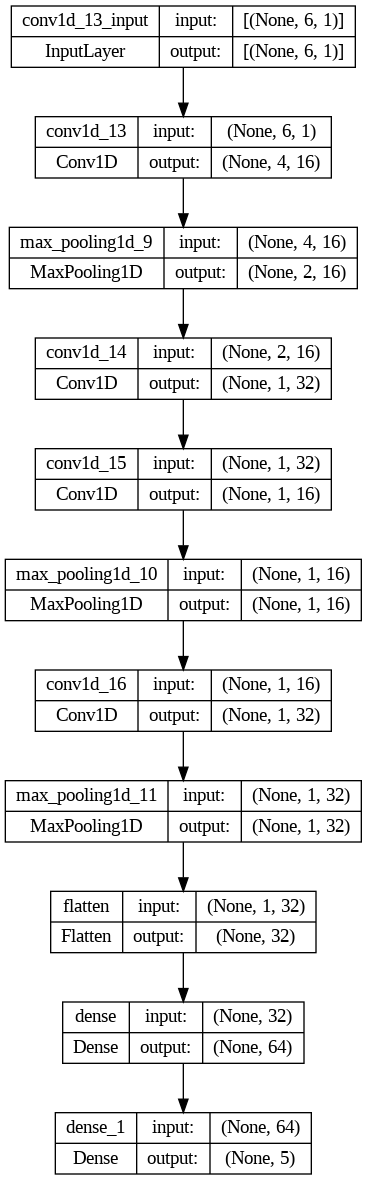

In [47]:
tf.keras.utils.plot_model(model,show_shapes=True)

The fit function is used to train the model. It takes the following arguments:

trainX: The input training data (features) of shape (number of samples, number of timesteps, number of features).
train_y: The target training data (labels) in categorical format.
epochs: The number of times to iterate over the entire training dataset.
batch_size: The number of samples per gradient update.
verbose: Verbosity mode (0: silent, 1: progress bar).
validation_data: Data on which to evaluate the loss and any model metrics at the end of each epoch. Here, it's the validation data (valX, val_y).
The model will be trained for the specified number of epochs, and the training progress will be displayed based on the verbose argument.

The training history, including the loss and accuracy metrics for both the training and validation sets, will be stored in the history object.

In [48]:
# fit network
history = model.fit(trainX, train_y, epochs=epochs,
          batch_size=batch_size, verbose=1,
          validation_data=(valX, val_y))

Epoch 1/100
1442/1442 [==============================] - 21s 7ms/step - loss: 1.3005 - accuracy: 0.4385 - val_loss: 1.0235 - val_accuracy: 0.5821
Epoch 2/100
1442/1442 [==============================] - 10s 7ms/step - loss: 0.9459 - accuracy: 0.5964 - val_loss: 0.8762 - val_accuracy: 0.6225
Epoch 3/100
1442/1442 [==============================] - 8s 6ms/step - loss: 0.8451 - accuracy: 0.6226 - val_loss: 0.8057 - val_accuracy: 0.6467
Epoch 4/100
1442/1442 [==============================] - 9s 7ms/step - loss: 0.7920 - accuracy: 0.6534 - val_loss: 0.7684 - val_accuracy: 0.6691
Epoch 5/100
1442/1442 [==============================] - 9s 7ms/step - loss: 0.7614 - accuracy: 0.6769 - val_loss: 0.7486 - val_accuracy: 0.6850
Epoch 6/100
1442/1442 [==============================] - 8s 6ms/step - loss: 0.7398 - accuracy: 0.6861 - val_loss: 0.7251 - val_accuracy: 0.6962
Epoch 7/100
1442/1442 [==============================] - 10s 7ms/step - loss: 0.7213 - accuracy: 0.6924 - val_loss: 0.7067 - val

The predict function is called on the model to generate predictions for the input test data (testX). It returns the predicted probabilities for each class.

The predicted probabilities (prb) represent the model's confidence or likelihood for each class label for the given test samples.

These predicted probabilities can be further processed or evaluated for tasks such as classification or performance analysis.

In [49]:
prb = model.predict(testX)

451/451 [==============================] - 1s 2ms/step


The argmax function is applied to prb along axis=1, which means it will find the index (class) with the highest probability for each sample. The resulting array, predictions, will contain the predicted class labels for the test samples.

By taking the argmax along axis=1, we are selecting the class label with the highest probability for each sample, effectively converting the predicted probabilities into discrete class labels.



In [50]:
predictions = np.argmax(prb, axis=1)

The classification_report function is called with the true labels (test_y) and the predicted labels (predictions) as arguments. It calculates various metrics such as precision, recall, F1-score, and support for each class. The classification report summarizes these metrics for each class, as well as the average values across all classes.

The printed classification report provides insights into the model's performance, including metrics such as precision (the proportion of correctly predicted positive instances out of all predicted positive instances), recall (the proportion of correctly predicted positive instances out of all actual positive instances), F1-score (the harmonic mean of precision and recall), and support (the number of samples in each class).

By examining the classification report, you can assess the model's performance for each class and overall.







In [51]:
print(classification_report(test_y, predictions))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80      1936
           1       0.73      0.75      0.74      3751
           2       0.75      0.74      0.74      2677
           3       0.95      0.95      0.95      3209
           4       0.70      0.65      0.68      2846

    accuracy                           0.78     14419
   macro avg       0.78      0.78      0.78     14419
weighted avg       0.78      0.78      0.78     14419



conf_mat = confusion_matrix(test_y, predictions)
print(conf_mat)

In [52]:
conf_mat = confusion_matrix(test_y, predictions)
print(conf_mat)

[[1603   43  192   37   61]
 [  71 2802  245   19  614]
 [ 297  231 1971   79   99]
 [  19   31   82 3062   15]
 [  99  735  136   15 1861]]


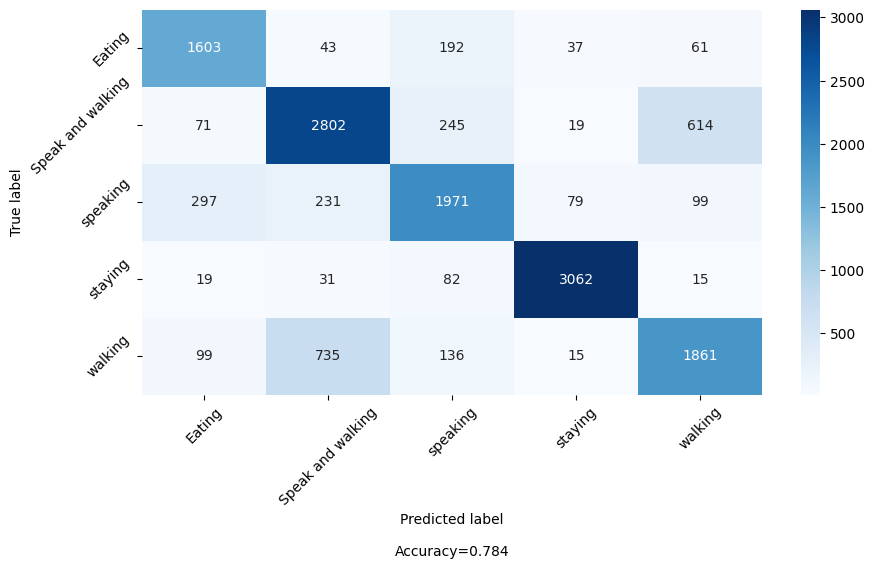

In [53]:
class_names = ['Eating', 'Speak and walking','speaking','staying','walking']
make_confusion_matrix(conf_mat, figsize=(10,5),percent=False,categories=class_names,cbar=True)
plt.savefig('conf_mat.png', dpi=300)

In [54]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


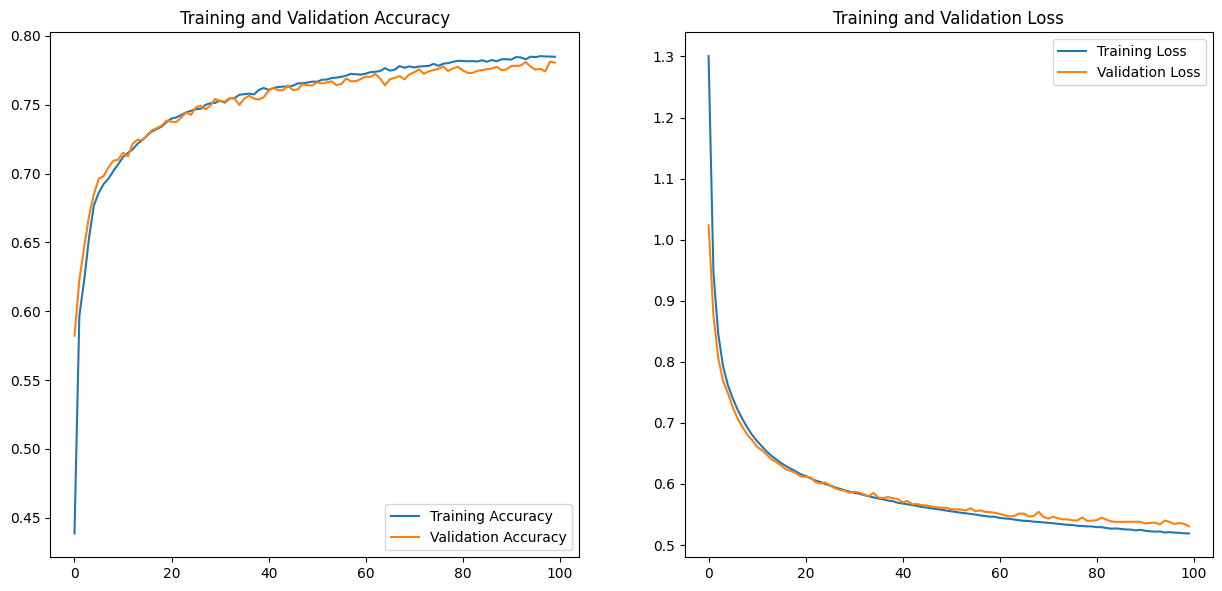

In [55]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()